In [1]:
import pandas as pd
##matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
##suppress warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
sns.set_context("paper", font_scale=1.4, rc={"lines.linewidth": 1.5})

##set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'

sns.set_style("white")



# Make all labels/title bold and set a default font size
mpl.rcParams['axes.labelweight'] = 'semibold'
mpl.rcParams['axes.titleweight'] = 'semibold'
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.linewidth'] = 2

sns.set_style('white', {'axes.linewidth': 0.5})
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

##set font
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = 'Aptos'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']


plt.rcParams['text.color'] = "#222222"
plt.rcParams['axes.labelcolor'] = "#222222"
# plt.rcParams['xtick.color'] = "#222222"
# plt.rcParams['ytick.color'] = "#222222"



# Fig 1 - Performance vs Probability Of Rewiring

In [4]:
## read
df = pd.read_csv("./data/pairwise_smallw_basic.csv")   

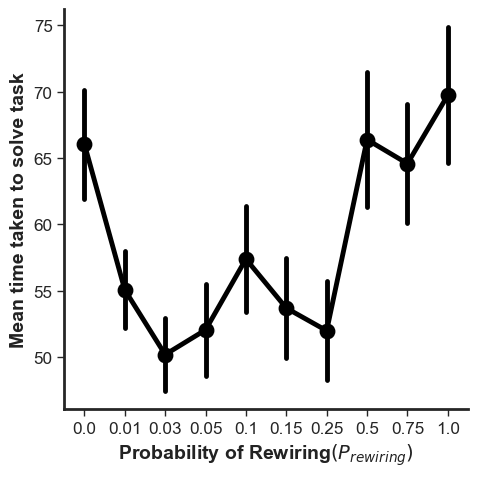

In [5]:
category_order = [0, 0.01, 0.03, 0.05,  0.1, 0.15, 0.25, 0.5, 0.75, 1.0]

g= sns.catplot(x="ProbEdge", y="meanMaxStep", 
               color='black',
            data=df,           
            kind="point", height=5,errorbar=('se'), 
          order = category_order,
          linewidth= 3.5, legend=False)

##rename the x-axis label
g.set_axis_labels("Probability of Rewiring" + r"$(P_{rewiring})$", "Mean time taken to solve task")
g.set_titles("Network Performance")
plt.tight_layout()

##save
# g.savefig("../paperFigs2/NetworkPerformance.png", format='png', dpi=1200)


# Fig 2(a). Information Theory Metrics

In [6]:
##melt the data and have redundancy, mi, hamming into one column

df_melt = pd.melt(df, id_vars=['ProbEdge', 'Iteration', 'meanMaxStep'], 
                value_vars=['meanRed', 'meanMI', 
                        'meanHamming',  'meanCMI',  'proportion_negative',
                            'meanSyn', 'meanNonSyn'], 
                var_name='Metric', value_name='Value')

df_melt.head()

,ProbEdge,Iteration,meanMaxStep,Metric,Value
0,0.01,1001,50.0,meanRed,0.231525
1,0.01,1002,68.0,meanRed,0.250816
2,0.01,1003,45.0,meanRed,0.222953
3,0.01,1004,91.0,meanRed,0.282984
4,0.01,1005,61.0,meanRed,0.330237


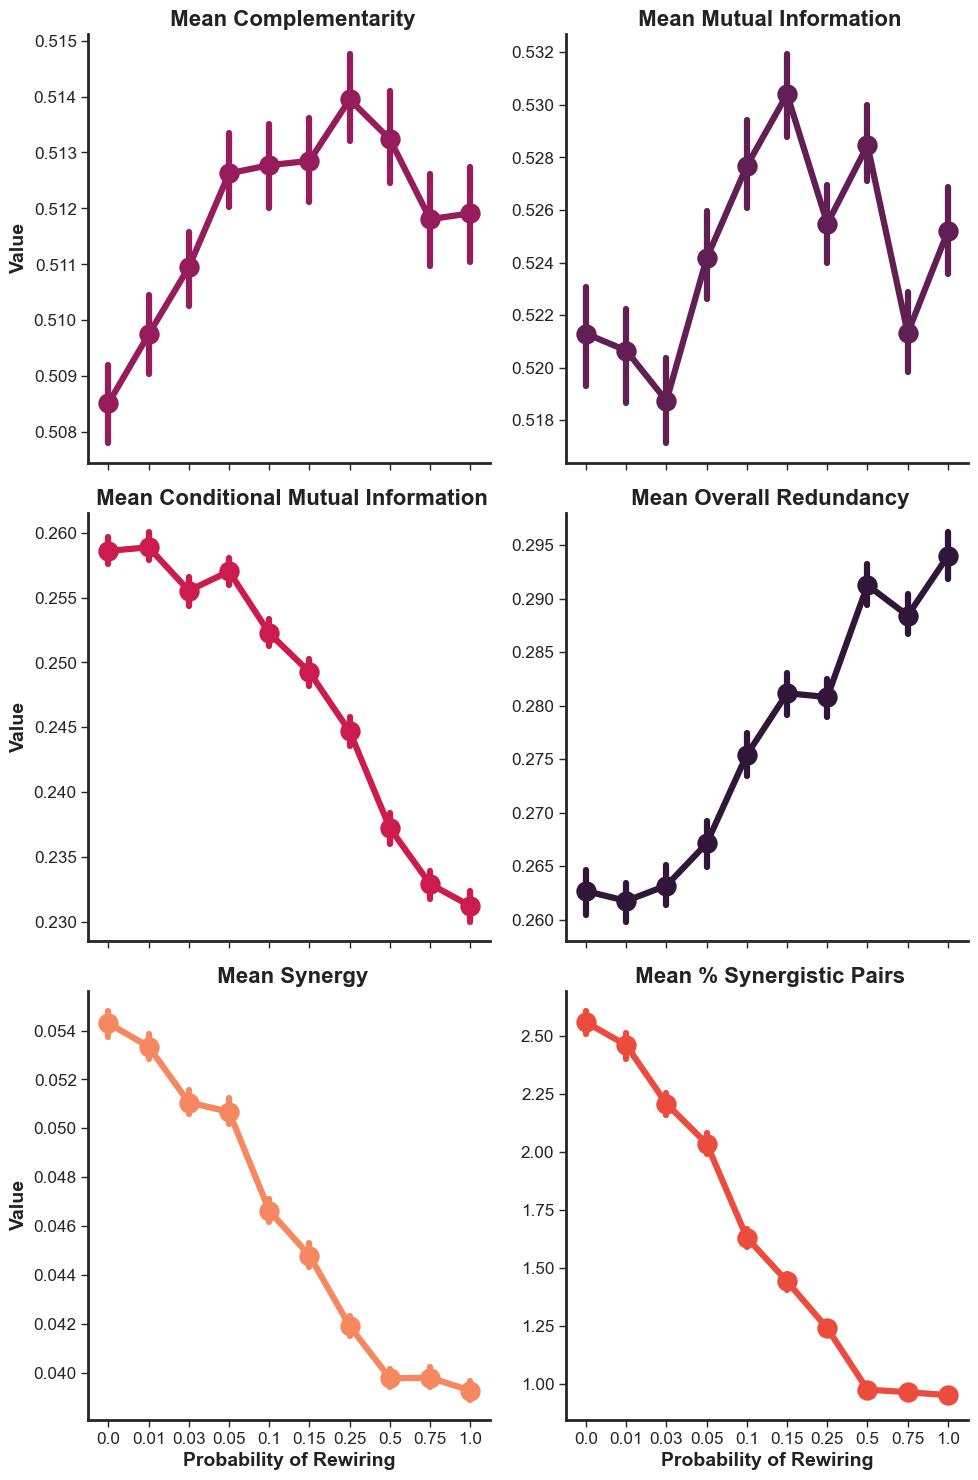

In [7]:
df_melt['Metric'] = df_melt['Metric'].replace({'meanRed': 'Mean Overall Redundancy',
                                                       
                                                         'meanMI': 'Mean Mutual Information',
                                                         'meanHamming': 'Mean Complementarity',
                                                         'meanCMI': 'Mean Conditional Mutual Information',
                                                         'meanSyn': 'Mean Synergy', 
                                                            'meanNonSyn': 'Mean Redundancy',
                                                            'proportion_negative': 'Mean % Synergistic Pairs'})
                                                        
                                                        # })

g= sns.catplot(x="ProbEdge", y="Value", hue='Metric',
            data=df_melt, col='Metric', sharey=False,
            kind="point", height=5,errorbar=('ci', 65), 
            col_order=[ 'Mean Complementarity', 
                       'Mean Mutual Information',
                          'Mean Conditional Mutual Information', 
                          'Mean Overall Redundancy', 'Mean Synergy',
                          'Mean % Synergistic Pairs'
                          
                        ],
            col_wrap=2,
            palette='rocket', linewidth= 4.5, legend=False)

##rename the x-axis label
for ax in g.axes.flat:
    ax.set_xlabel("Probability of Rewiring")

##remove "metric =" from the title
for ax in g.axes.flat:
    ax.set_title(ax.get_title().split('=')[-1])



##save the plot
# figname = "overallMetricsvsProbEdge"
# g.savefig(f"paperFigs/{figname}.svg", format='svg', dpi=1200)
# g.savefig(f"../paperFigs2/{figname}.png", format='png', dpi=1200)
# g.savefig(f"paperFigs/{figname}.pdf", format='pdf', dpi=1200)





# Fig 2(b)

In [8]:
df = pd.read_csv("./data/means_pathlength.csv")

##rename the columns

df = df.rename(columns={ 'meanMI': 'Mean Mutual Information',
                                'meanRed': 'Mean Redundancy',
                                'meanHamming': 'Mean Complementarity',
                                'meanCMI': 'Mean Conditional Mutual Information',
                                'meanSyn': 'Mean Synergy',
                                'proportion_negative': 'Mean % Synergistic Pairs'})
                              
                      

In [11]:
df.head()

,ProbEdge,Iteration,Path_Length,Mean Redundancy,Mean Mutual Information,Mean Complementarity,meanMaxStep,Mean Conditional Mutual Information,Mean % Synergistic Pairs,Mean Synergy,meanNonSyn,Performance
0,0.01,1001,1,0.297183,0.816959,0.447460,50.0,0.519777,0.000000,NaN,0.297183,Fast
1,0.01,1001,2,0.275992,0.681416,0.467103,50.0,0.405423,0.333333,0.040810,0.277052,Fast
2,0.01,1001,3,0.252352,0.563813,0.486111,50.0,0.311460,1.666667,0.040810,0.257321,Fast
3,0.01,1001,4,0.237724,0.504183,0.495952,50.0,0.266459,3.500000,0.050319,0.248171,Fast
4,0.01,1001,5,0.225691,0.451817,0.504643,50.0,0.226126,4.388889,0.058504,0.238737,Fast


In [9]:
df_melt = pd.melt(df_melt, id_vars=['ProbEdge', 'Iteration', 'Path_Length'], 
                      value_vars=[ 'Mean Redundancy', 'Mean Mutual Information', 
                                  'Mean Complementarity',  'Mean Conditional Mutual Information', 
                                  'Mean Synergy', 'Mean % Synergistic Pairs'],           
                      var_name='Metric', value_name='Value')

df_melt.head()

ValueError: value_name (Value) cannot match an element in the DataFrame columns.

In [10]:
df_melt['ProbEdge'] = df_melt['ProbEdge'].astype(str)
g= sns.catplot(x="Path_Length", y="Value", hue='ProbEdge',
            data=df_melt[df_melt['Path_Length'] <=5], 
            col='Metric', sharey=False,
            kind="point", height=5,errorbar=('ci', 65), 
            col_order=[ 'Mean Complementarity', 
                       'Mean Mutual Information',
                          'Mean Conditional Mutual Information', 
                          'Mean Redundancy', 'Mean Synergy',
                          'Mean % Synergistic Pairs'
                          
                        ],
                        col_wrap=2,
            dodge=True,
            hue_order=['0.0', '0.01', '0.03', '0.05', '0.1', '0.15', '0.25', '0.5', '0.75', '1.0'],
            palette='coolwarm', linewidth= 3)


for i,ax in enumerate(g.axes.flat):
    if i ==  4: 
        ax.set_xlabel("Length of the shortest path between a pair of nodes",)
        ##set coords
        ax.xaxis.set_label_coords(1, -0.1)
                      
                      
    else:
        ax.set_xlabel("")


# ##remove "metric =" from the title
for ax in g.axes.flat:
    ax.set_title(ax.get_title().split('=')[-1])

g._legend.set_title("P(rewiring)")




# ##save the plot
# figname = "PathLengthvsInfoMetricsvsProbEdge"

# # g.savefig(f"paperFigs/{figname}.svg", format='svg', dpi=1200)
# g.savefig(f"../paperFigs2/{figname}.png", format='png', dpi=1200)
# # g.savefig(f"paperFigs/{figname}.pdf", format='pdf', dpi=1200)

KeyError: 'Path_Length'

# Fig 3(a)

In [12]:
df = pd.read_csv("./data/means_timeseries.csv")

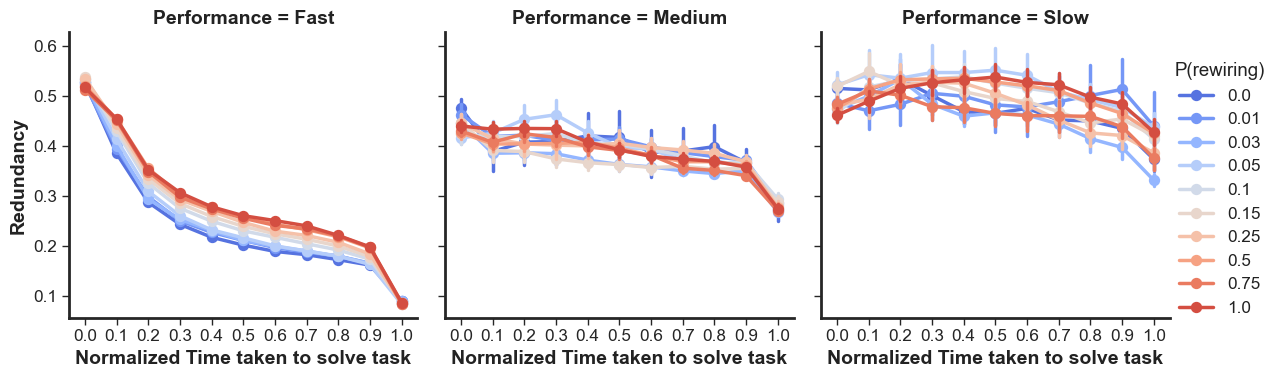

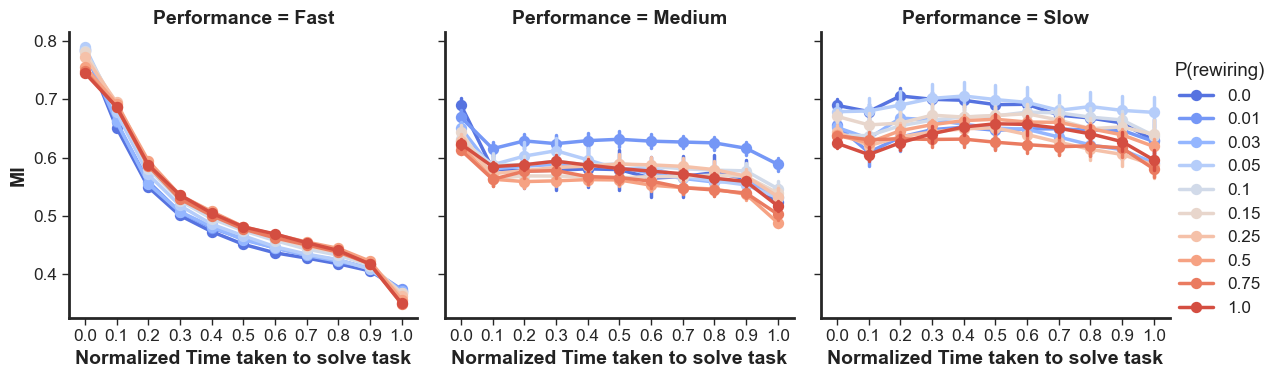

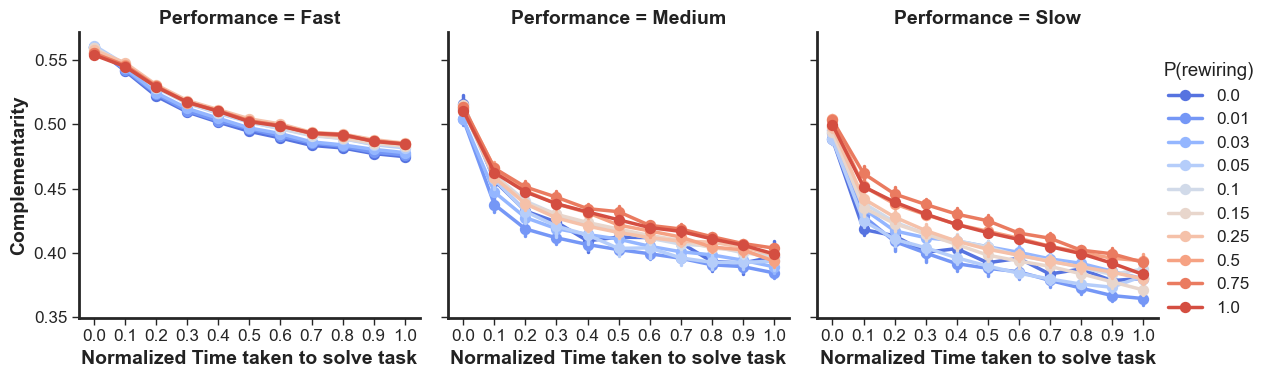

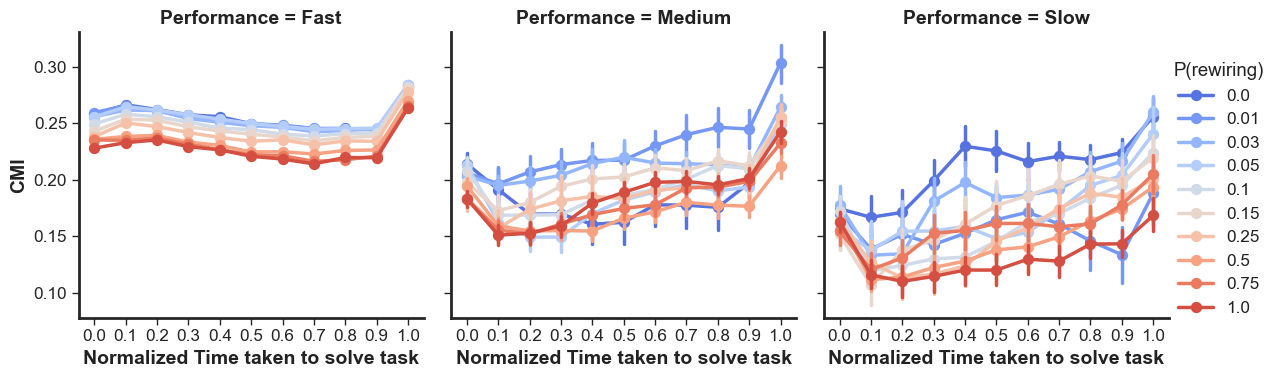

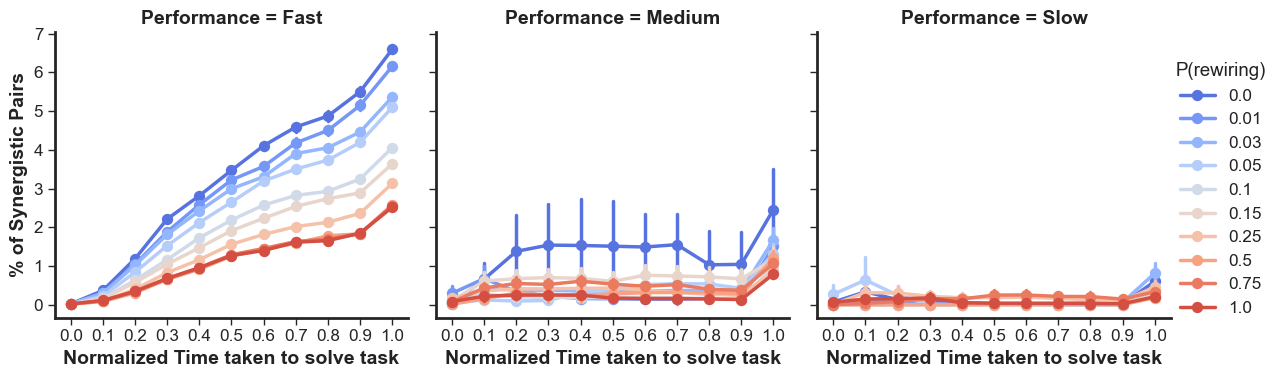

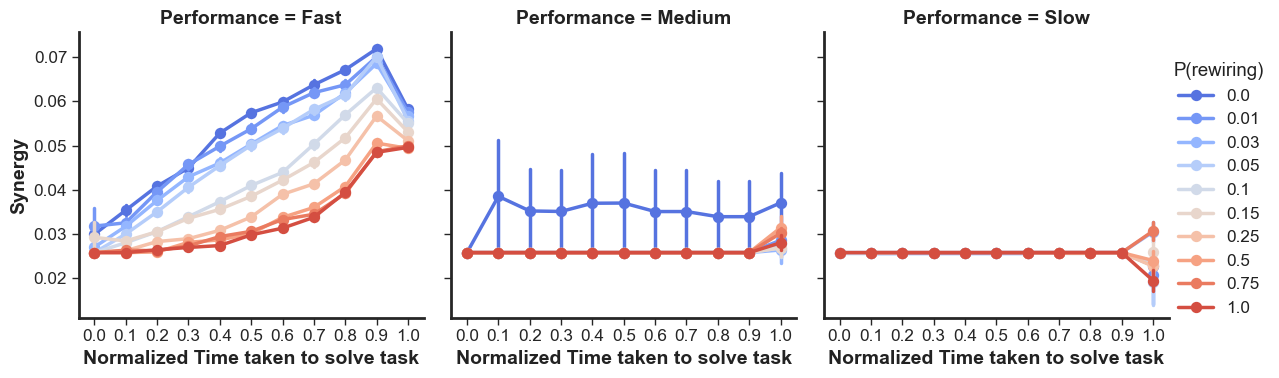

In [13]:


metrics = ['meanRed', 'meanMI',            'meanHamming', 'meanCMI',         'proportion_negative', 'meanSyn']

names = ['Redundancy', 'MI', 'Complementarity', 'CMI', 
         '% of Synergistic Pairs', 'Synergy']

df['Performance'] = pd.cut(df['meanMaxStep'], bins=3, labels=['Fast','Medium' ,'Slow'])


probE = [0.0, 0.01, 0.03, 0.05, 0.1, 0.15, 0.25, 0.5, 0.75, 1.0]
df["ProbEdge"] = df["ProbEdge"].astype(str)

##convert to string each element in the list
probE = [str(i) for i in probE]

for metric, name in zip(metrics, names):
    g = sns.catplot(hue="ProbEdge", y=metric, x='normalizedStep',
                    data=df, col='Performance',
                    kind="point", height=4,  ci=65,
                    hue_order=probE,
                    palette='coolwarm',
                    
                   linewidth=2.5)

    g.set_axis_labels( "Normalized Time taken to solve task", f"{name}")

    g._legend.set_title("P(rewiring)")
    # plt.draw()
    # plt.show()

    # ## Save figures
    # figname = f"{metric}_vsPerformance_vsTime_3levels"
    # g.savefig(f"../paperFigs2/{figname}.svg", format='svg', dpi=1200)
    # g.savefig(f"../paperFigs2/{figname}.png", format='png', dpi=1200)
    # # g.savefig(f"paperFigs/{figname}.pdf", format='pdf', dpi=1200)


# Fig 3(b)

In [14]:
df = pd.read_csv("data/pairwise_smallw_basic.csv")


Text(24.249999999999986, 0.5, 'Mean time taken to solve task')

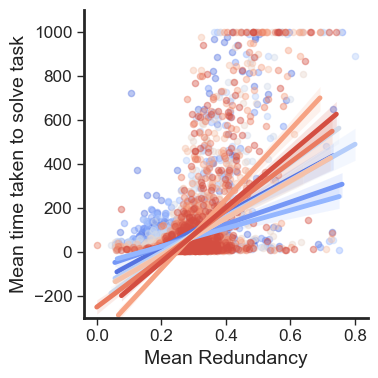

In [15]:
sns.lmplot(x='meanRed', y='meanMaxStep',
            data=df, 
            hue='ProbEdge',
                scatter_kws={'s': 20, 'alpha': 0.4},
          height=4, palette='coolwarm',
              line_kws={'linewidth': 3.5}, 
              scatter=True, ci=65,
              legend=False,
              truncate=True
              )

plt.ylim(-300, 1100)
##rename the x-axis label
plt.xlabel('Mean Redundancy', fontweight='regular')
plt.ylabel('Mean time taken to solve task', fontweight='regular')

#save
# plt.savefig("../paperFigs2/RedundancyScatter.png", format='png', dpi=300)


# Fig 3(c)

In [16]:
from matplotlib.colors import LogNorm


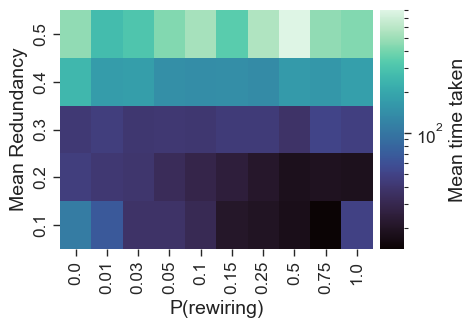

In [17]:
means2 = pd.read_csv("data/pairwise_smallw_basic.csv")
means2['ProbEdge'] = means2['ProbEdge'].astype(float)

df = means2[['meanRed', 'meanMaxStep', 'ProbEdge', 'Iteration']]


##round meanRed to 2 decimal places
df['meanRed'] = df['meanRed'].round(1)
df_filtered = df[df['meanRed'] <= 0.5]

# Create bins
num_bins = 7
df_filtered['R_bin'] = pd.cut(df_filtered['meanRed'], bins=num_bins)
df_filtered['NW_bin'] = pd.cut(df_filtered['ProbEdge'], bins=num_bins)

##remove where meanRed is 0
df_filtered = df_filtered[df_filtered['meanRed'] > 0]

# Pivot table of mean performance
pivot_df = df_filtered.pivot_table(
    values='meanMaxStep',
    # index='R_bin',
    index='meanRed',
    columns='ProbEdge', 
    aggfunc='mean',

)

# Plot heatmap
plt.figure(figsize=(5,3.5))
ax = sns.heatmap(
    pivot_df[::-1], 
    cmap='mako', 
    norm=LogNorm(),
    cbar_kws={'label': 'Mean time taken ', 'orientation': 'vertical', 
              'pad': 0.02, 'aspect': 10, }
)

plt.xlabel('P(rewiring)', fontweight='regular')
plt.ylabel('Mean Redundancy', fontweight='regular')

ax.collections[0].colorbar.set_label('Mean time taken', fontweight='regular')

plt.tight_layout()

##save the plot
# figname = "HeatmapPerformance"
# plt.savefig(f"../paperFigs2/{figname}.png", format='png', dpi=300)


# Fig 4 

In [18]:
dfmain = pd.read_csv("./data/potionsTrajectory.csv")


### function to calculate Diagonality Index

In [19]:
import numpy as np
import pandas as pd

def compute_iteration_diagonality(sub_df):
    """
    Compute the angle-based diagonality for each iteration.
    
    Parameters:
      sub_df : DataFrame containing columns 'Iteration', 'a', 'b'
               (with a starting point at (0,0) already added).
    
    Returns:
      A dictionary mapping each iteration to its net angle-based diagonality score.
    """
    iteration_diagonality = {}
    
    # Group by each iteration
    for it, group in sub_df.groupby('Iteration'):
        group = group.reset_index(drop=True)
        # Compute the next state for each row
        group['a_next'] = group['a'].shift(-1)
        group['b_next'] = group['b'].shift(-1)
        # Only consider steps within the same iteration
        valid = group['Iteration'] == group['Iteration'].shift(-1)
        group = group[valid]
        
        # Compute stepwise movements
        u = group['a_next'] - group['a']
        v = group['b_next'] - group['b']
        
        # Sum movements to get the net vector for the iteration
        net_u = u.sum()
        net_v = v.sum()
        
        if np.abs(net_u) + np.abs(net_v) == 0:
            # No net movement – you could set this to np.nan or 0
            iteration_diagonality[it] = np.nan
        else:
            # Calculate the angle (in radians) of the net movement
            net_angle = np.arctan2(net_v, net_u)
            # Compute deviation from a perfect 45° (pi/4) and -135° (-3pi/4) diagonal
            diff1 = np.abs(np.arctan2(np.sin(net_angle - np.pi/4), np.cos(net_angle - np.pi/4)))
            diff2 = np.abs(np.arctan2(np.sin(net_angle + 3*np.pi/4), np.cos(net_angle + 3*np.pi/4)))
            diff = np.minimum(diff1, diff2)
            # Normalize the deviation: a 45° (pi/4) difference yields 0 and 0 difference yields 1.
            net_diagonality = 1 - (diff / (np.pi/4))
            iteration_diagonality[it] = net_diagonality

    return iteration_diagonality



### figure code

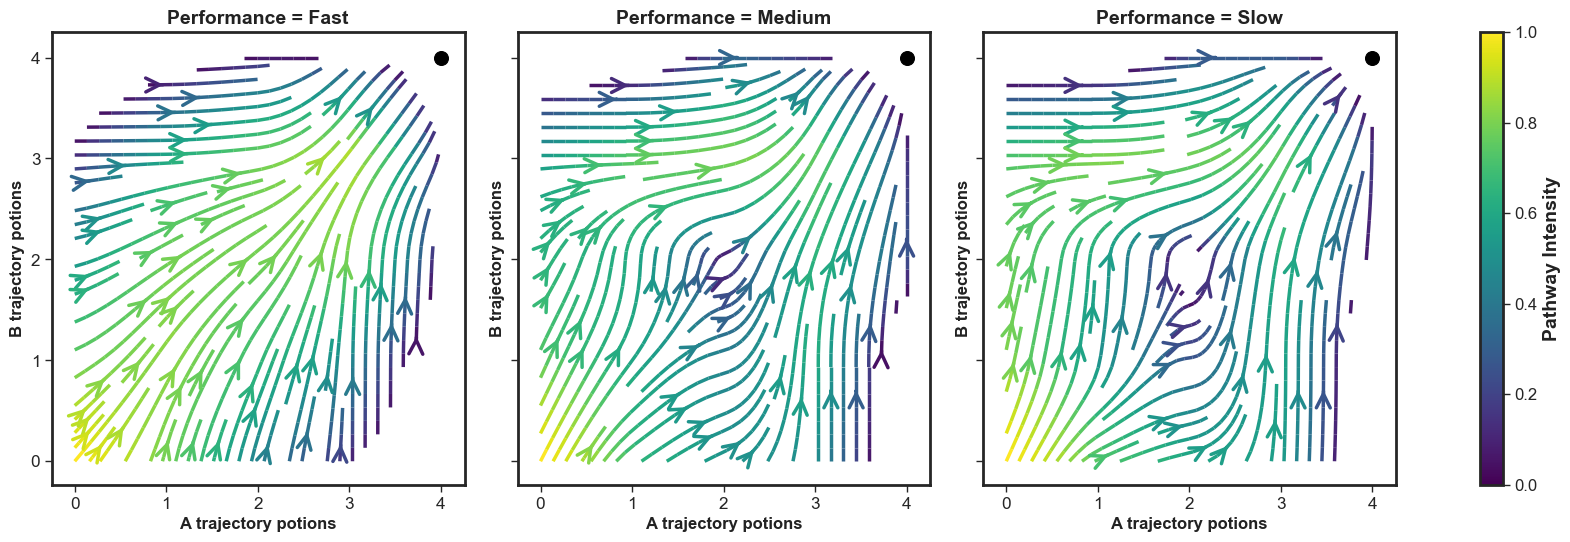

In [ ]:
import matplotlib.colors as mcolors
import numpy as np
from matplotlib.colors import ListedColormap

# Create a custom colormap based on viridis, with transparency for low values
viridis = plt.cm.viridis(np.linspace(0, 1, 256))
viridis[:10, -1] = 0  # Set the first 10 color levels (near zero) to transparent
transparent_viridis = ListedColormap(viridis)
performance_categories = ['fast', 'medium', 'slow']

# Define grid for the streamline plot
x, y = np.meshgrid(range(5), range(5))  # 5x5 grid for a and b
# x,y = np.meshgrid(np.linspace(0, 4, 6), np.linspace(0, 4, 6))

##empty dictionary to store diagonality index
diagonality_index_dict = {}

# Plotting streamline flows for each performance category
fig, axes = plt.subplots(1, len(performance_categories), figsize=(18, 6), sharex=True, sharey=True)

for ax, performance in zip(axes, performance_categories):
    # Filter by performance
    sub_df = dfmain[dfmain['Performance'] == performance].copy()
    ## Add (a=0, b=0) to the start of each iteration
    sub_df = sub_df.groupby('Iteration', group_keys=False).apply(
        lambda x: pd.concat([pd.DataFrame({'a': [0], 'b': [0], 
                                        'Iteration': [x['Iteration'].iloc[0]], 
                                        'ProbEdge':[x['Iteration'].iloc[0]] }), x], ignore_index=True)
    )

    # Compute next states
    sub_df['a_next'] = sub_df['a'].shift(-1)
    sub_df['b_next'] = sub_df['b'].shift(-1)
    sub_df['valid'] = (sub_df['Iteration'] == sub_df['Iteration'].shift(-1))  # Ensure same iteration
    sub_df = sub_df[sub_df['valid']]

    # Compute flow (u, v)
    # Compute flow (u, v) and flow magnitude
    sub_df['u'] = sub_df['a_next'] - sub_df['a']  # Change in 'a'
    sub_df['v'] = sub_df['b_next'] - sub_df['b']  # Change in 'b'

    # Group by grid cell (a, b) to calculate total flow and flow intensity
    flow = sub_df.groupby(['a', 'b']).apply(
        lambda g: pd.Series({
            'u': g['u'].sum(),  # Total u-direction flow
            'v': g['v'].sum(),  # Total v-direction flow
            'intensity': np.sqrt((g['u']**2).sum() + (g['v']**2).sum())  # Flow magnitude
        })
    ).reset_index()

    # Initialize u and v arrays for the grid
    u = np.zeros_like(x, dtype=float)
    v = np.zeros_like(y, dtype=float)
    magnitude = np.zeros_like(x, dtype=float)

    # Fill u, v, and magnitude with the calculated flow values
    for _, row in flow.iterrows():
        u[int(row['b']), int(row['a'])] = row['u']
        v[int(row['b']), int(row['a'])] = row['v']
        magnitude[int(row['b']), int(row['a'])] = row['intensity']  # Use the new intensity
    # Set a threshold for magnitude
    # threshold = 4  # Adjust this value as needed
    # magnitude[magnitude < threshold] = 0  # Suppress low-intensity flows


    iteration_diags = compute_iteration_diagonality(sub_df)

    ##append to diagonality index dictionary
    diagonality_index_dict[performance] = iteration_diags
    ##append to diagonality index dictionary
    diagonality_index_dict[performance] = iteration_diags
    ##quanitfy 
    # d = diagonality_index(u, v)

    # th = angle_diagonality_index(u, v, magnitude)

    ##normalize the magnitude
    magnitude = magnitude/magnitude.max()


    # Apply a logarithmic normalization for the color scale
    norm = mcolors.LogNorm(vmin=magnitude[magnitude > 0.1].min(), vmax=magnitude.max())

    # Streamline plot with logarithmic color mapping
    ax.streamplot(
        x, y, u, v, color=magnitude, 
        cmap=transparent_viridis, linewidth=2.5, density=1, arrowstyle='->', 
        arrowsize=2.5 ,
        norm=norm
    )

    # q = ax.quiver(x, y, u, v, magnitude, cmap='viridis', scale=10, norm=norm)
    
    # ax.scatter(flow['a'], flow['b'], color='red', s=50, edgecolor='black', label="Data Points")

    # Mark the convergence point (4, 4)
    ax.scatter(4, 4, color='black', s=100, label='Convergence Point (4, 4)')

    #convert performance categories to first letter uppercase
    performance = performance.capitalize()

    ax.set_title(f'Performance = {performance}',  font='Arial',fontweight='semibold', size=14)
    ax.set_xlabel('A trajectory potions', size=12, font='Arial',fontweight='semibold')
    ax.set_ylabel('B trajectory potions', size=12, font='Arial',fontweight='semibold')   
    ax.set_xticks(range(5))
    ax.set_yticks(range(5))
    # ax.grid(True)


# Adjust layout and add colorbar
plt.tight_layout(pad=2)
cbar = plt.colorbar(
    plt.cm.ScalarMappable(cmap='viridis'), 
    ax=axes, 
    label='Pathway Intensity', 
    location='right'
)
# Increase the font size of the color bar label
cbar.ax.tick_params(labelsize=12)  
cbar.set_label('Pathway Intensity', fontsize=14)  

plt.show()

##save 
# output_prefix = 'streamline_plot_lowD'
# fig.savefig(f"paperFigs/{output_prefix}.svg", format='svg', dpi=1200)
# fig.savefig(f"../paperFigs2/{output_prefix}.png", format='png', dpi=1200)
# fig.savefig(f"paperFigs/{output_prefix}.pdf", format='pdf', dpi=1200)



In [21]:
##print second level of dictionary

new_dict = {}
for k, v in diagonality_index_dict.items():
    # print(k)
    for k1, v1 in v.items():
        # print(k1, v1)
        new_dict[k1] = v1
        
##merge the diagonality index with the main df on iteration

dfmain['Diagonality'] = dfmain['Iteration'].map(new_dict)

dfmain.head()

,a,b,Iteration,ProbEdge,MaxStep,Performance,Diagonality
0,0,1,1,0.0,23,fast,1.0
1,1,1,1,0.0,23,fast,1.0
2,1,2,1,0.0,23,fast,1.0
3,2,2,1,0.0,23,fast,1.0
4,3,2,1,0.0,23,fast,1.0


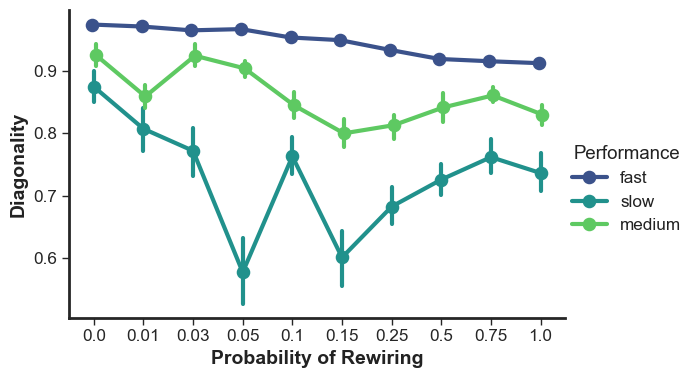

In [22]:
ax = sns.catplot(x='ProbEdge', y='Diagonality',             
            hue='Performance', 
            dodge=True,
            height=4,

            errorbar=('ci', 65),

            data=dfmain, kind='point',  aspect=1.5, palette='viridis', 
            linewidth= 3)


##rename the x-axis label
for ax in ax.axes.flat:
    ax.set_xlabel("Probability of Rewiring")

##save 
# output_prefix = 'DiagonalityvsProbEdgevsPerformance'
# fig.savefig(f"../paperFigs2/{output_prefix}.png", format='png', dpi=100)


# ax.log_xscale()
#log
# plt.xscale('log', base=10, subs=[1,2,3,4,5,6,7,8,9])